In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
currency = pd.read_csv('data/currency.csv')
currency.head()

,Time,GEMS_GEMS_SPENT
0,5/1/17,1199436
1,5/2/17,1045515
2,5/3/17,586111
3,5/4/17,856601
4,5/5/17,793775


In [11]:
currency['Time'] = pd.to_datetime(currency['Time'])
currency.set_index('Time', inplace=True)

In [14]:
currency


,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775
...,...
2018-02-20,2166449
2018-02-21,1552313
2018-02-22,2175548


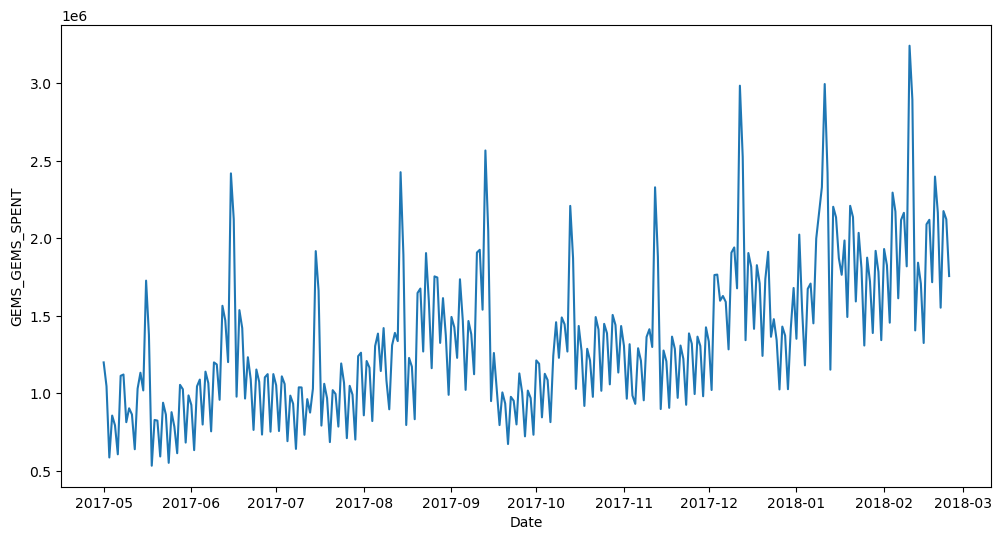

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(currency['GEMS_GEMS_SPENT'])
plt.xlabel('Date')
plt.ylabel('GEMS_GEMS_SPENT')

plt.show()

In [26]:
train_data = currency[:'2017-12-24']
test_data = currency['2018-02-24':]

In [27]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

/home/khalboy10/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/khalboy10/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/khalboy10/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# Make predictions
predictions = model_fit.predict(start='2018-02-24', end='2020-12-01', dynamic=False)

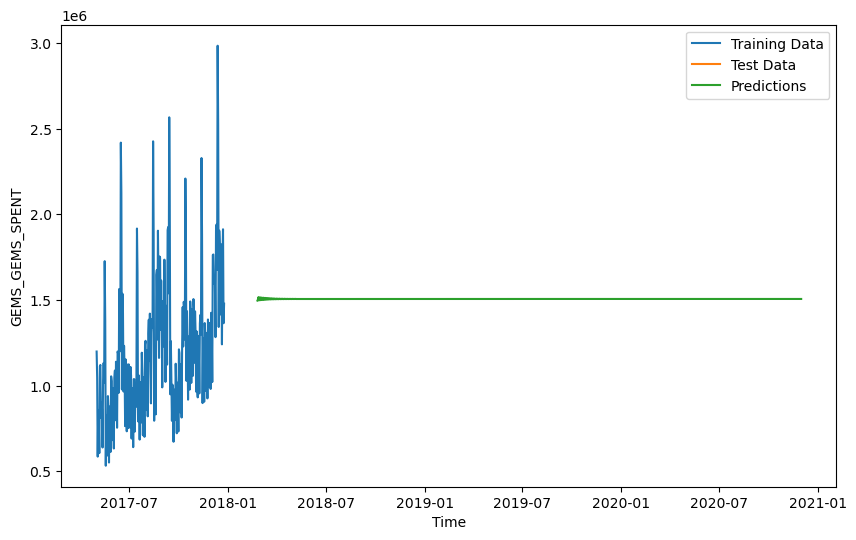

In [29]:
# Plot the predicted values along with the original data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('GEMS_GEMS_SPENT')
plt.legend()

plt.show()

In [30]:
actual_values = test_data.to_numpy().flatten()
predicted_values = predictions.to_numpy()
mape = np.mean(np.abs((predicted_values - actual_values) / actual_values)) * 100

print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Percentage Error (MAPE): 14.2416585882739
